<div style="background-color:cornsilk;"><H1 style="color:crimson;">Capstone Project | Insurance Customer Response Prediction</h1></div>

In [ ]:
# <img src="https://media.istockphoto.com/id/547230828/photo/paper-with-words-insurance-policy-form-and-money.jpg?s=2048x2048&w=is&k=20&c=DhrB11FP0BkG3GJVUmnsvM0i-kNZp_iD3KdrThNcDCQ=" width="1800">

<div style="border-radius:10px; padding: 15px; background-color:cornsilk; font-size:120%; text-align:left">

<h3 align="left"><font color=crimson>Problem:</font></h3>

This project aims to enhance the understanding of customer behavior and improve the policy sales process in the insurance industry. By leveraging machine learning, the project seeks to predict customer responses to insurance policy offers based on various customer and policy characteristics. The goal is to develop a robust machine learning model that accurately forecasts customer responses, enabling improved targeted marketing, optimized sales channel strategies, and increased efficiency in the policy sales process.

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

<h3 align="left"><font color=crimson>Objectives:</font></h3>

* __Data Exploration: Conduct comprehensive EDA using visualization techniques to understand feature distributions and relationships with customer responses. 
* __Data Preprocessing: Handle any missing values, encode categorical variables, and apply appropriate scaling techniques. 
* __Feature Engineering: Consider creating new features (e.g., combining age and driving license information) and analyze feature importance. 
* __Model Selection: Evaluate various classification algorithms including Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. 
* __Performance Evaluation: Use appropriate metrics such as Accuracy, Precision, Recall, F1-Score, and ROC-AUC to assess model performance. 
Visualization: Create clear and informative visualizations using libraries like Matplotlib and Seaborn to communicate data insights and model performance. 
* __Code Quality: Ensure well-structured, commented Python code following best practices.

In [1]:
# Table of content

<h2 align="left"><font color=crimson>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import ipywidgets as widgets
from IPython.display import display, HTML


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 100

# Configure Seaborn plot styles: Set background color and use dark| grid
sns.set(rc={'axes.facecolor': 'cornsilk'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:crimson ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Data\Data\data.csv")

<a id="overview"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)


<a id="basic"></a>
# <b><span style='color:crimson'>Step 3.1 |</span><span style='color:crimson'> Dataset Basic Information</span></b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


<a id="basic"></a>
# <b><span style='color:crimson'>Step 3.2 |</span><span style='color:crimson'> View Data</span></b>

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [7]:
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
58702,58703,Male,25,1,43.0,1,< 1 Year,No,28360.0,152.0,192,0
325460,325461,Male,44,1,28.0,0,1-2 Year,Yes,38441.0,124.0,256,1
54244,54245,Male,51,1,28.0,0,1-2 Year,Yes,43809.0,124.0,20,0
370144,370145,Male,47,1,15.0,1,1-2 Year,No,29298.0,91.0,164,0
316167,316168,Female,28,1,50.0,0,< 1 Year,No,26250.0,152.0,25,0


<a id="basic"></a>
# <b><span style='color:crimson'>Step 3.3 |</span><span style='color:crimson'> Dataset Shape and Size</span></b>

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.ndim

<a id="basic"></a>
# <b><span style='color:crimson'>Step 3.4 |</span><span style='color:crimson'> Dataset Missing Values </span></b>

In [8]:
df.isna().sum().sum()

0

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.drop('id', axis=1, inplace=True)

<a id="basic"></a>
# <b><span style='color:crimson'>Step 3.5 |</span><span style='color:crimson'> Dataset Duplicate Values </span></b>

In [7]:
df.duplicated().sum()

0

In [8]:
#Keep Only the first occurance

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

<h2 align="left"><font color=crimson>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __381108 entries__, ranging from index 0 to 381108.
    
    
* __Columns__: There are __12 columns__ in the dataset corresponding to various attributes of the patients and results of tests.
    
    
* __Data Types__:
    - Most of the columns (6 out of 14) are of the __int64__ data type.
    - Few 3 columns are float64 data type.
    - Remaining are Object Data types
    
    
* __Missing Values__: There don't appear to be any missing values in the dataset as each column has 381108 non-null entries.
* __Duplicate Values__: There 269 duplicate entries in the dataset and we removed all these entries except firstspot.

In [11]:
# Define the continuous features
continuous_features = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium','Policy_Sales_Channel','Vintage']
#Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
#Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')
df.dtypes

id                       object
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                 object
dtype: object

<a id="num_statistics"></a>
# <b><span style='color:crimson'>Step 3.6 |</span><span style='color:crimson'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [12]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0


<div style="border-radius:10px; padding: 15px; background-color:cornsilk; font-size:115%; text-align:left">

<h3 align="left"><font color=crimson>Numerical Features:</font></h3>

* __`age`__: The average age of the Customer is approximately 38.8 years, with the youngest being 20.0	 and the oldest 85.0 years.
* __`Driving_License`__: The Driving License for the total people 381108 out of them only 811 doesnot have driving lincense.
* __`Region_Code	`__: The average people situated in this 26.388807  region is minimum at this point 0.0 and a maximum of 52.0.
* __`Previously_Insured`__: The average Insured peoples are 0.458210 and 54% peoples are insured.
* __`Annual_Premium`__: The average premium peoples pay annualy about 30564.389581 and minimum paid premium is 2630.0 and maximum is 540165.
* __`Vintage`__: The vintage values lies between the 10.0 % to 299 % maximum values.

<a id="num_statistics"></a>
# <b><span style='color:crimson'>Step 3.7 |</span><span style='color:crimson'> Summary Statistics for Categorical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [13]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,id,Gender,Vehicle_Age,Vehicle_Damage,Response
count,381109,381109,381109,381109,381109
unique,381109,2,3,2,2
top,1,Male,1-2 Year,Yes,0
freq,1,206089,200316,192413,334399


<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

<h3 align="left"><font color=crimson>Categorical Features (object data type):</font></h3>

* __`Gender`__: There are two unique values, with males (denoted as 0) being the most frequent category, occurring 206089 times out of 381109 entries.
* __`Vehicle_Age`__: Three unique types of 1 year, 2year and 1-2 years are present. The most common type is "1-2 Year", occurring 200316 times.
* __`Vehicle_Damage`__: There are two categories, and the most frequent one is "Yes" (indicating vehicle dameage), which appears 192413	 times.
* __`Response`__: Two unique results are present. The most common result is "__0__", appearing 334399 times.

<a id="eda"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.

<a id="univariate"></a>
# <b><span style='color:crimson'>Step 4.1 |</span><span style='color:crimson'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

    
* For __categorical data__: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

<a id="num_uni"></a>
### <b><span style='color:crimson'>Step 4.1.1 |</span><span style='color:crimson'> Numerical Variables Univariate Analysis</span></b>  

In [14]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [17]:
df["Response"].unique()


array([1, 0], dtype=object)

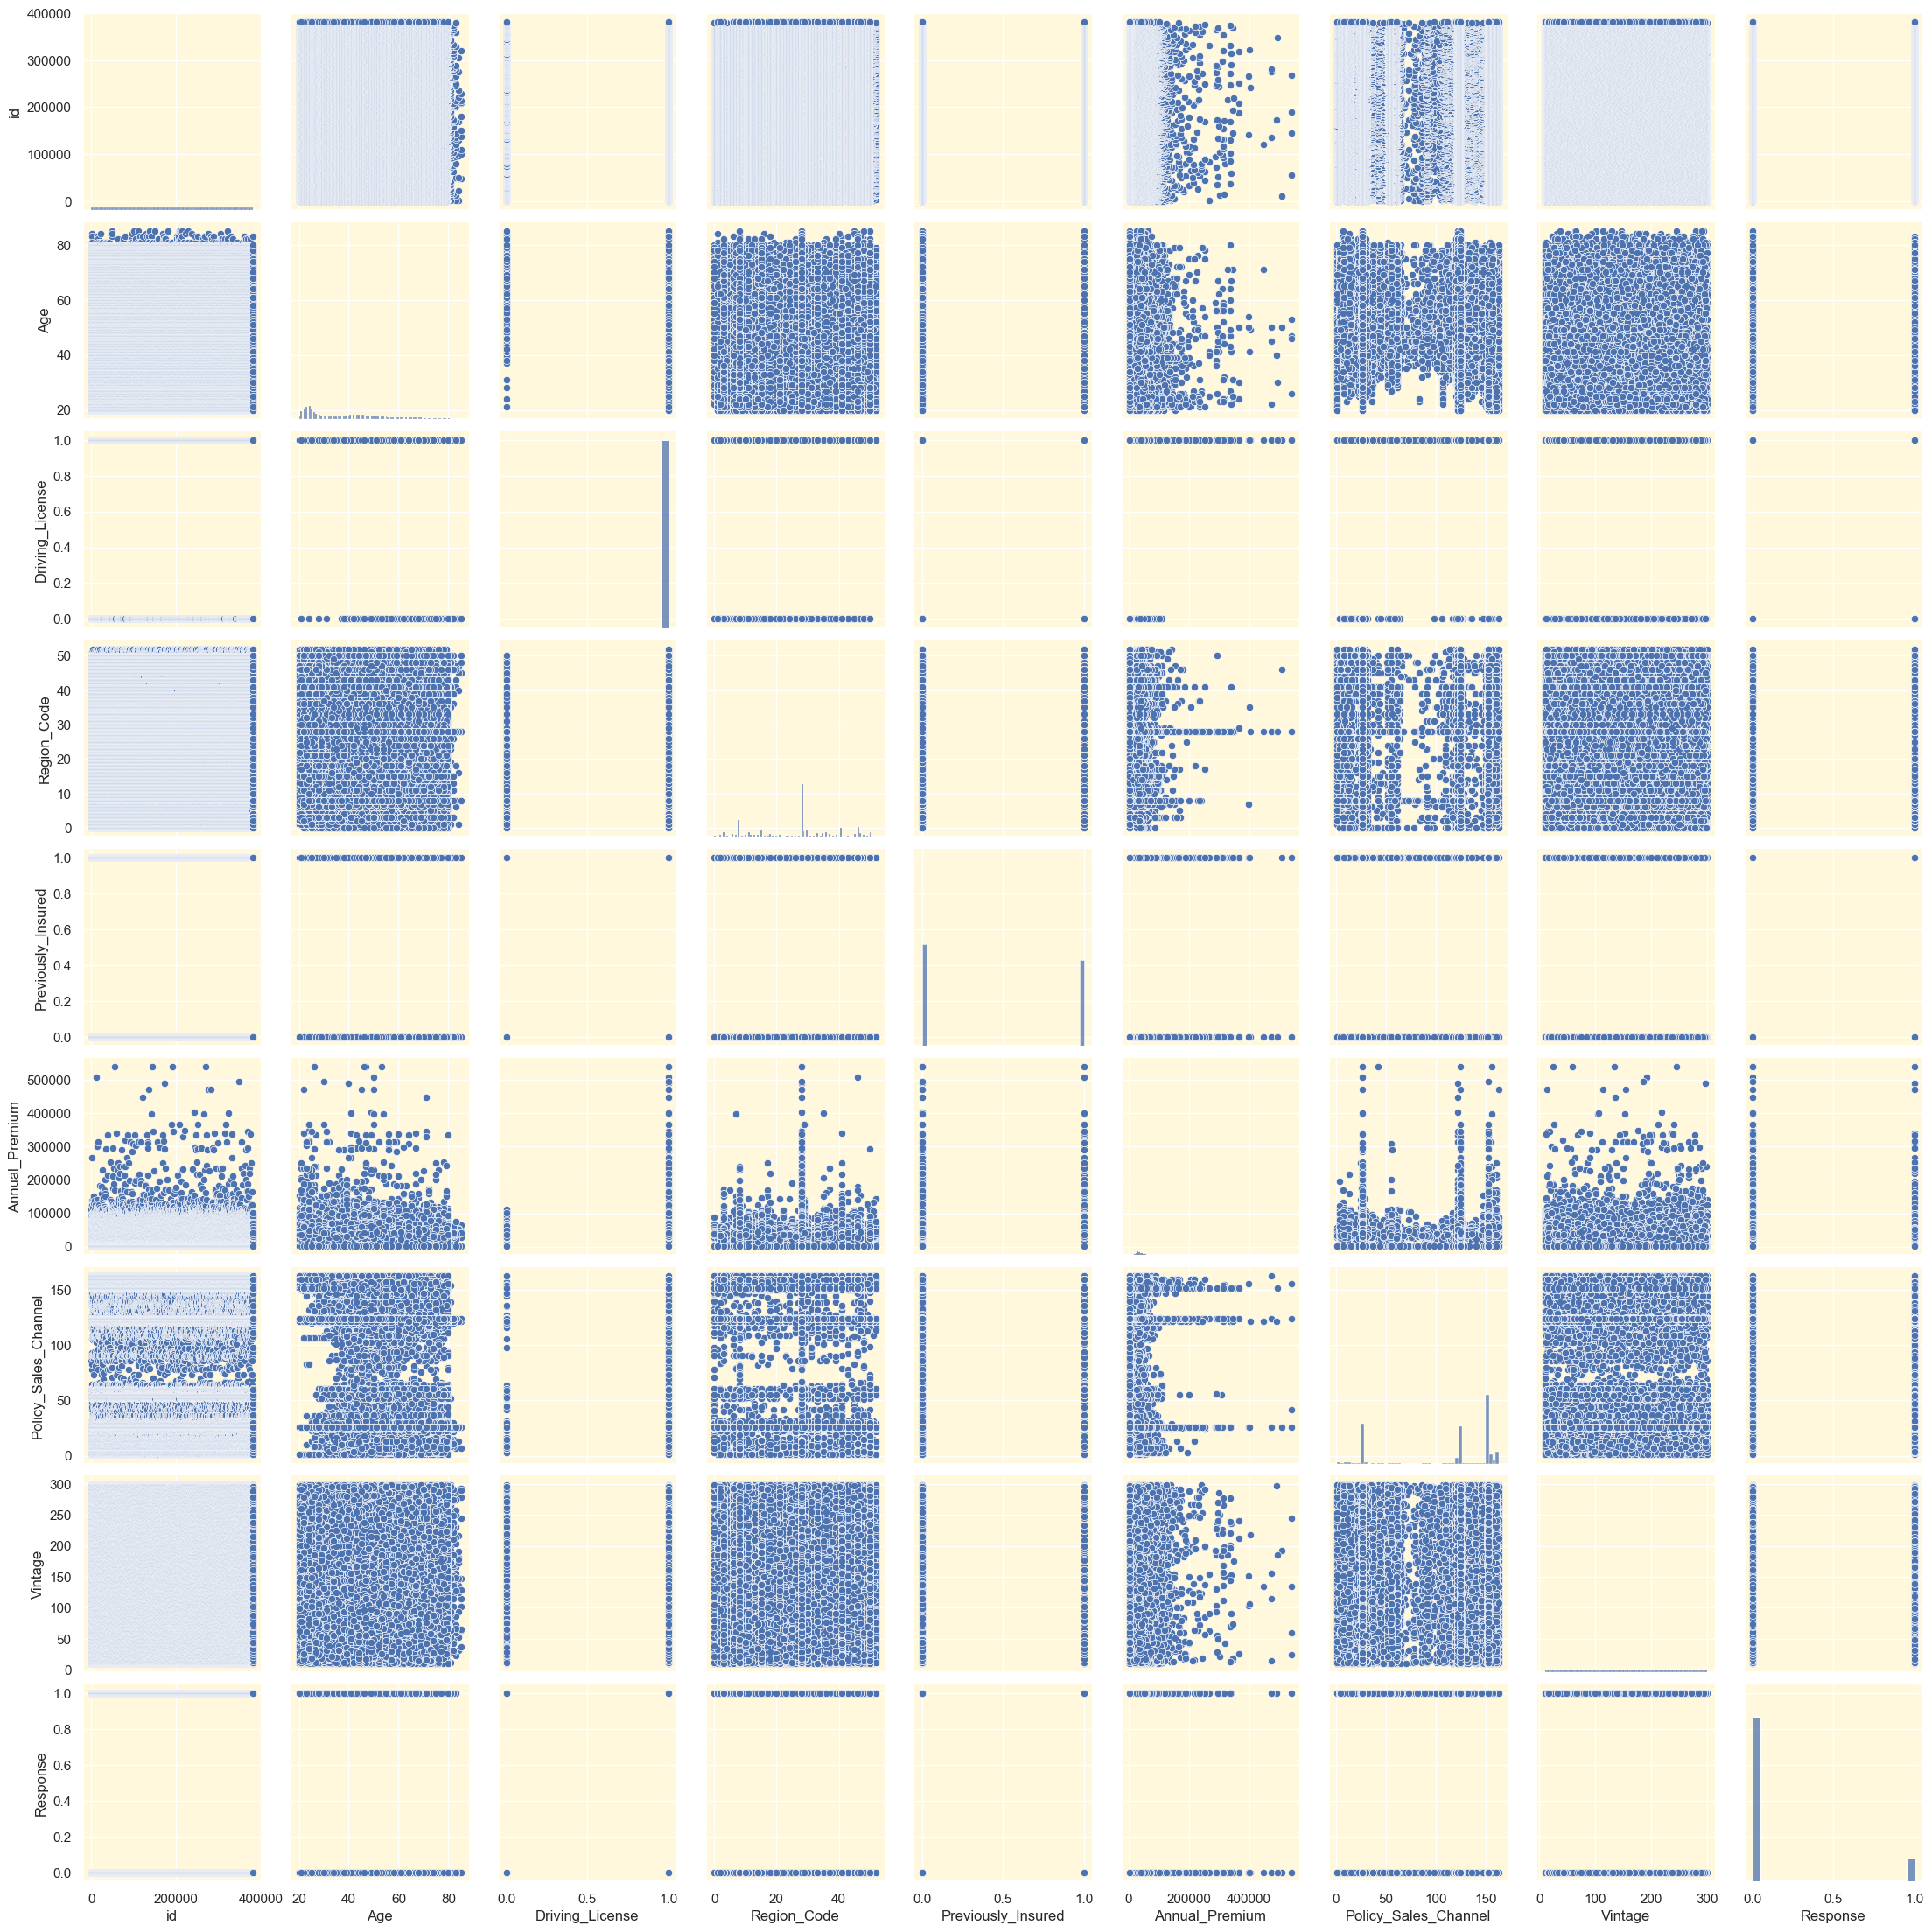

In [18]:
sns.pairplot(data=df)
plt.show()

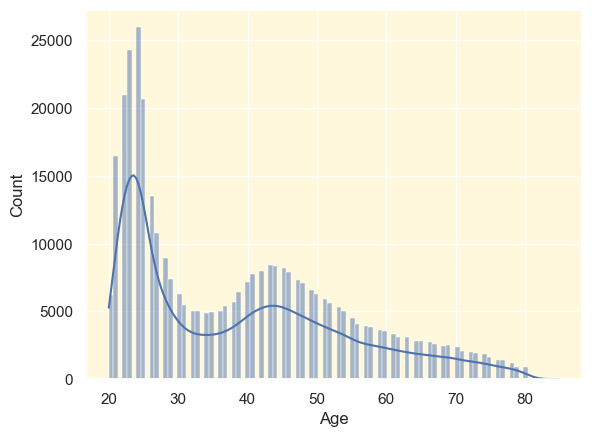

In [19]:
sns.histplot(df['Age'] ,kde=True)
plt.show()

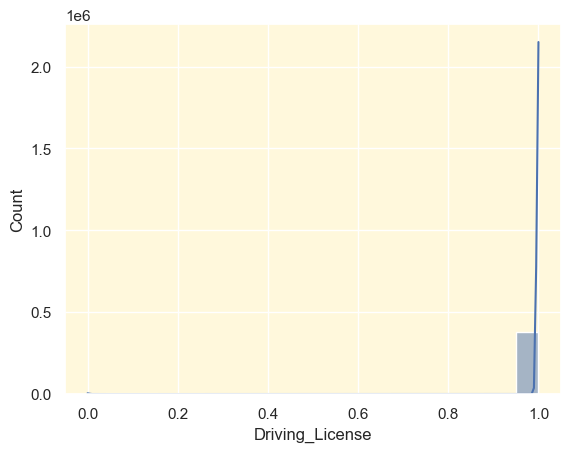

In [20]:
sns.histplot(df['Driving_License'], kde=True)
plt.show()

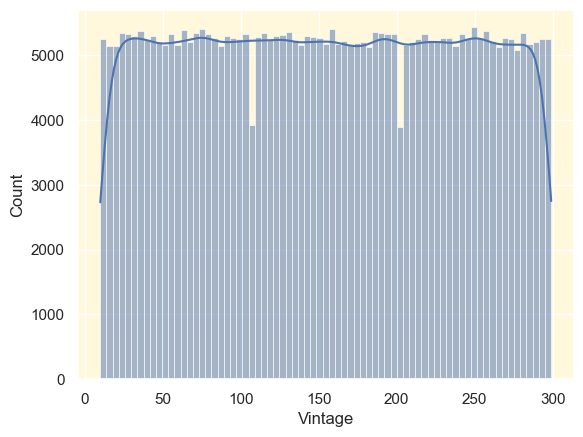

In [25]:
sns.histplot(df['Vintage'], kde=True)
plt.show()

In [26]:
corr_matrix = df[continuous_features].corr()

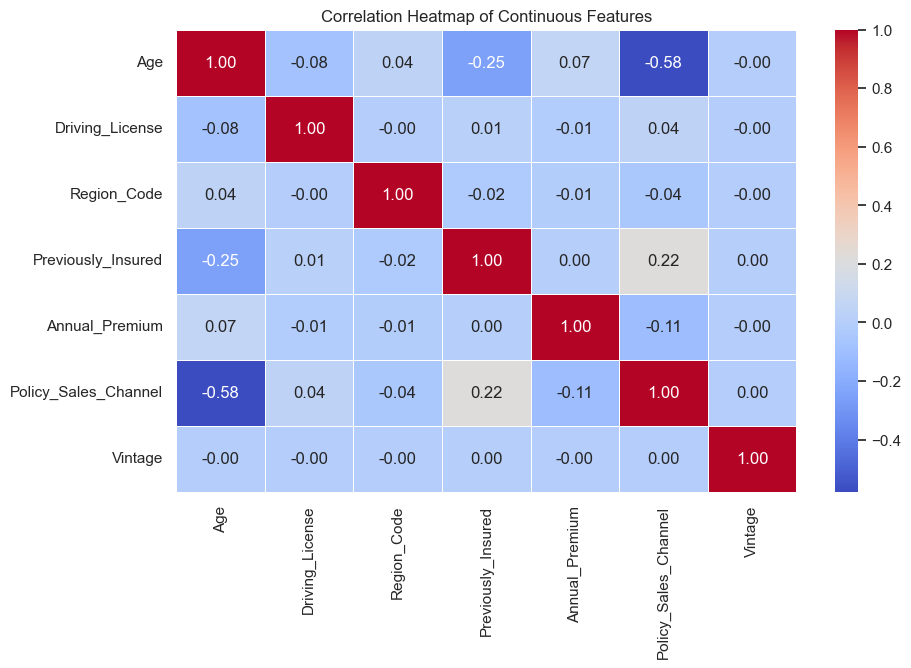

In [27]:
plt.figure(figsize=(10, 6))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Features")
plt.show()

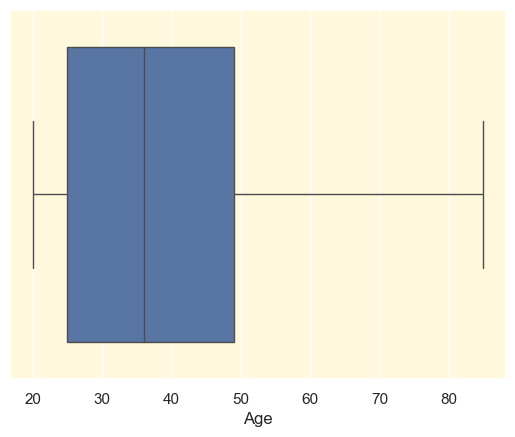

In [28]:
sns.boxplot(x=df['Age'])
plt.show()

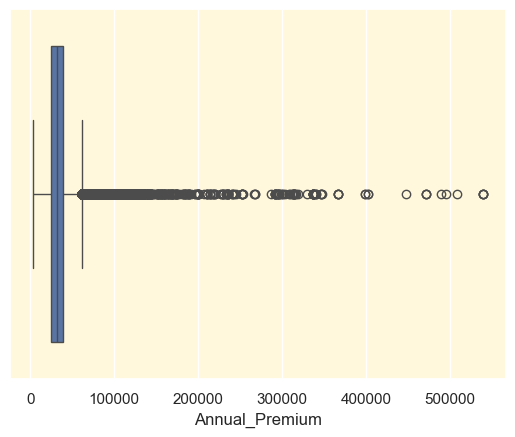

In [29]:
sns.boxplot(x=df['Annual_Premium'])
plt.show()

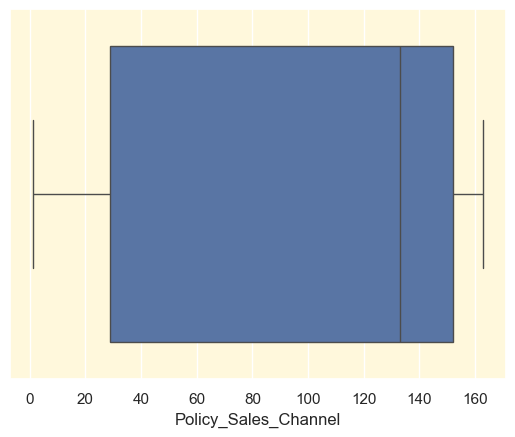

In [30]:
sns.boxplot(x=df['Policy_Sales_Channel'])
plt.show()

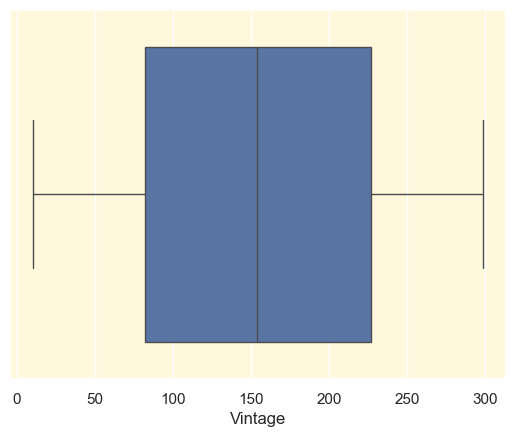

In [31]:
sns.boxplot(x=df['Vintage'])
plt.show()

<a id="cat_uni"></a>
### <b><span style='color:crimson'>Step 4.1.2 |</span><span style='color:crimson'> Categorical Variables Univariate Analysis</span></b>  

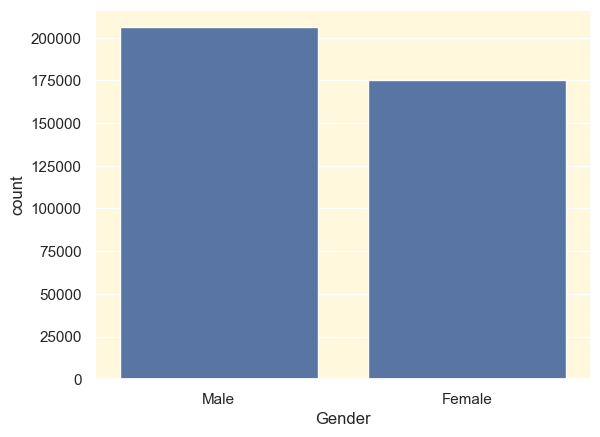

In [32]:
sns.countplot(x='Gender', data=df)
plt.show()

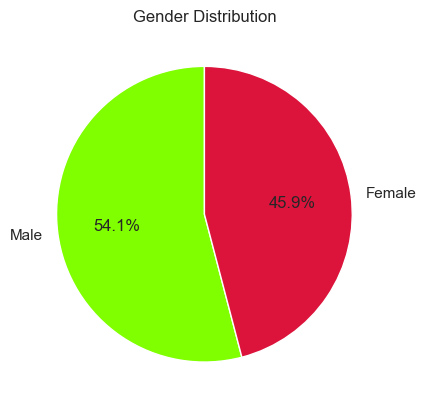

In [33]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['chartreuse', 'crimson'], startangle=90)
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

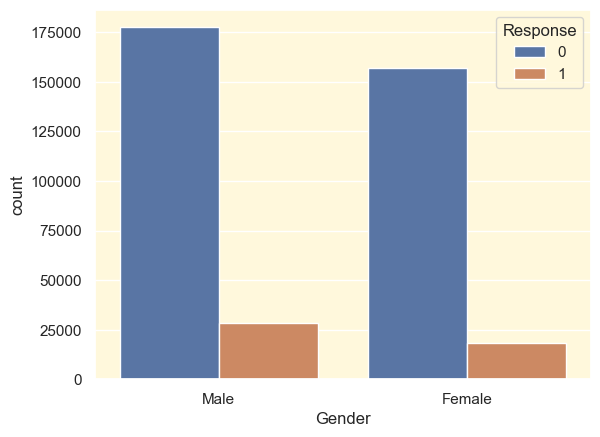

In [35]:
sns.countplot(x='Gender', hue='Response', data=df)
plt.show()

In [37]:
# Vehical age analysis

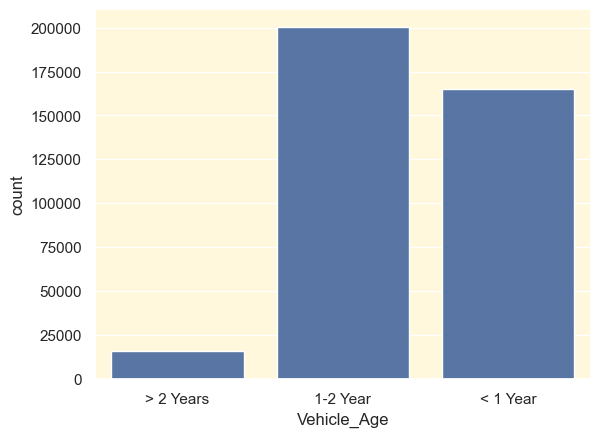

In [38]:
sns.countplot(x='Vehicle_Age', data=df)
plt.show()

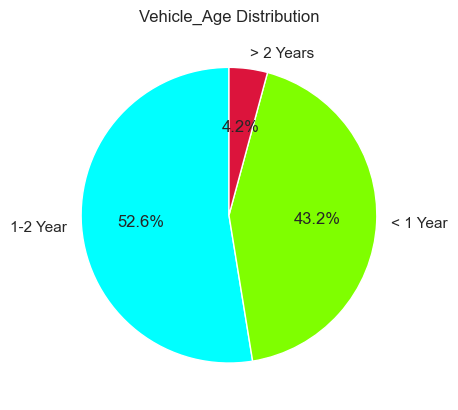

In [39]:
df['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', colors=['aqua', 'chartreuse','crimson'], startangle=90)
plt.ylabel('')
plt.title('Vehicle_Age Distribution')
plt.show()

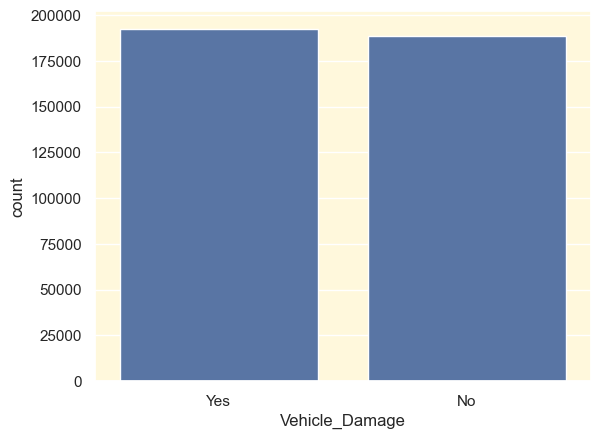

In [41]:
sns.countplot(x='Vehicle_Damage', data=df)
plt.show()

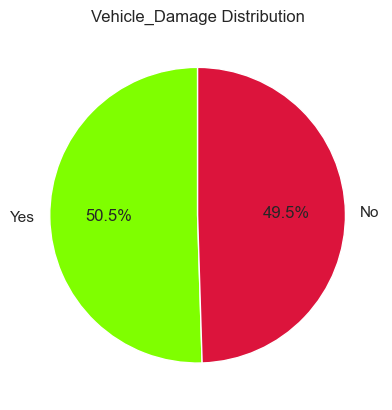

In [42]:
df['Vehicle_Damage'].value_counts().plot.pie(autopct='%1.1f%%', colors=['chartreuse', 'crimson'], startangle=90)
plt.ylabel('')
plt.title('Vehicle_Damage Distribution')
plt.show()

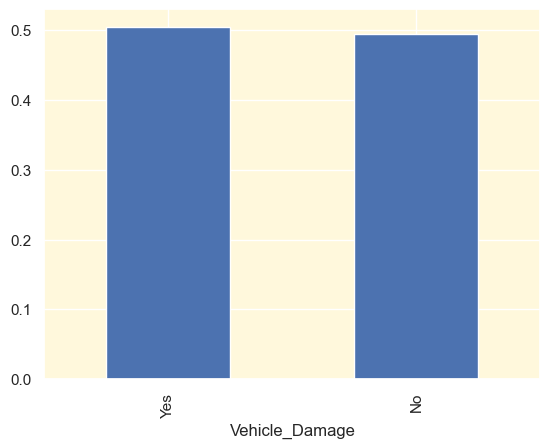

In [43]:
value_counts = df['Vehicle_Damage'].value_counts(normalize=True)
value_counts.plot(kind='bar')
plt.show()

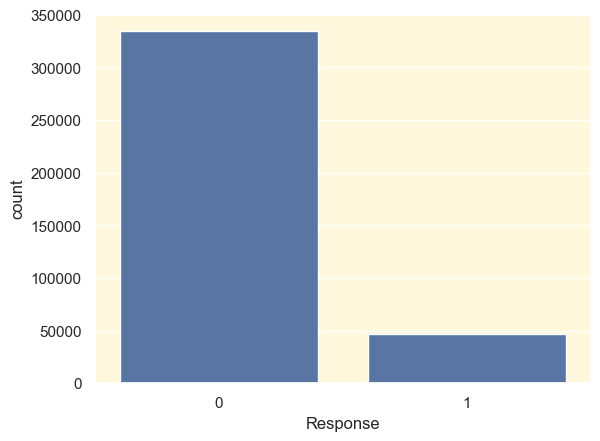

In [45]:
sns.countplot(x='Response', data=df)
plt.show()

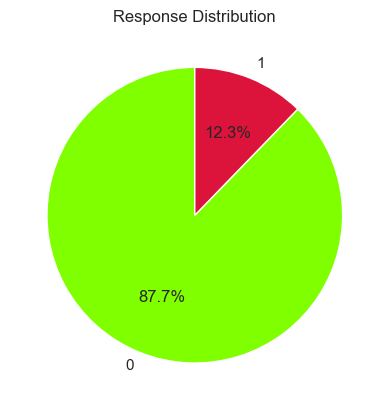

In [46]:
df['Response'].value_counts().plot.pie(autopct='%1.1f%%', colors=['chartreuse', 'crimson'], startangle=90)
plt.ylabel('')
plt.title('Response Distribution')
plt.show()

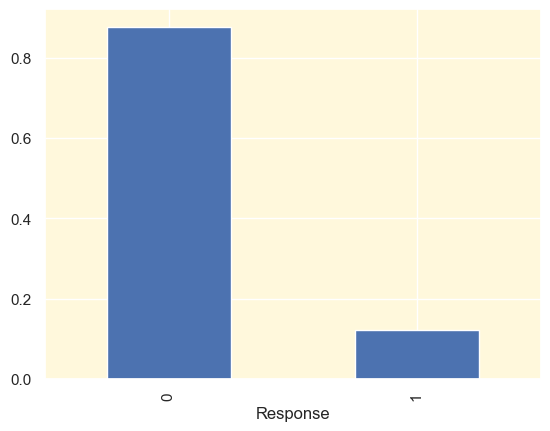

In [47]:
value_counts = df['Response'].value_counts(normalize=True)
value_counts.plot(kind='bar')
plt.show()

<a id="bivariate"></a>
# <b><span style='color:crimson'>Step 4.2 |</span><span style='color:crimson'> Bivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color:cornsilk; font-size:115%; text-align:left">

For our __bivariate analysis__ on the dataset's features with respect to the target variable:

* For __continuous data__: I am going to use __bar plots__ to showcase the average value of each feature for the different target classes, and __KDE plots__ to understand the distribution of each feature across the target classes. This aids in discerning how each feature varies between the two target outcomes.

    
* For __categorical data__: I am going to employ __100% stacked bar plots__ to depict the proportion of each category across the target classes. This offers a comprehensive view of how different categories within a feature relate to the target.

Through these visualization techniques, we are going to gain a deeper understanding of the relationship between individual features and the target, revealing potential predictors for heart disease.

<a id="num_target"></a>
### <b><span style='color:crimson'>Step 4.2.1 |</span><span style='color:crimson'> Numerical Features vs Target</span></b> 

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">
    
I am going to visualize each continuous feature against the target using two types of charts: 

* __Bar plots__ - showing the mean values.
* __KDE plots__ - displaying the distribution for each target category.

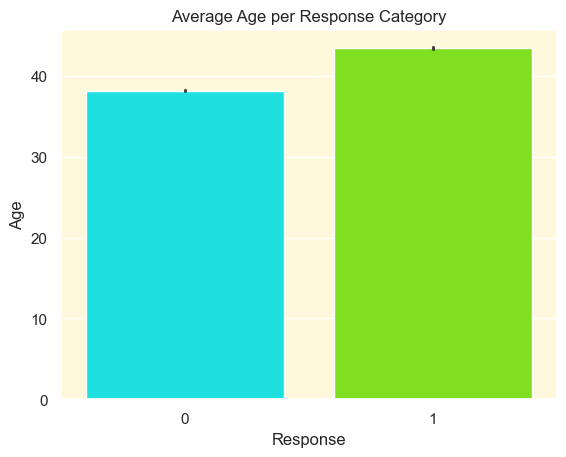

In [67]:
sns.barplot(x='Response', y='Age', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Age per Response Category")
plt.show()

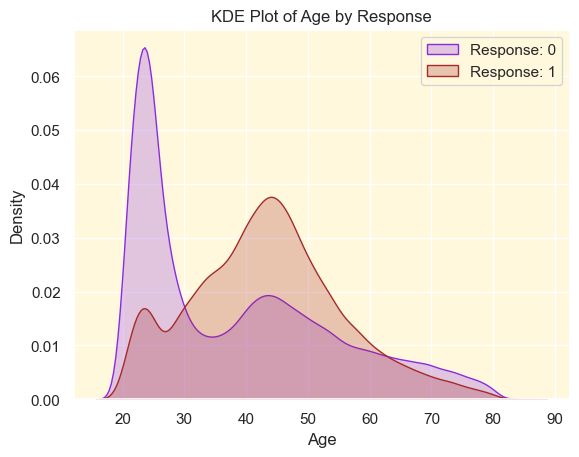

In [68]:
sns.kdeplot(data=df[df['Response'] == 0]['Age'], label='Response: 0', fill=True, color='blueviolet')
sns.kdeplot(data=df[df['Response'] == 1]['Age'], label='Response: 1', fill=True, color='brown')

plt.title("KDE Plot of Age by Response")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

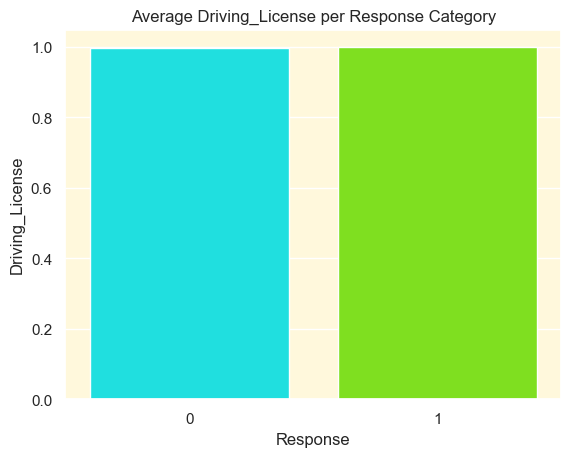

In [69]:
sns.barplot(x='Response', y='Driving_License', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Driving_License per Response Category")
plt.show()

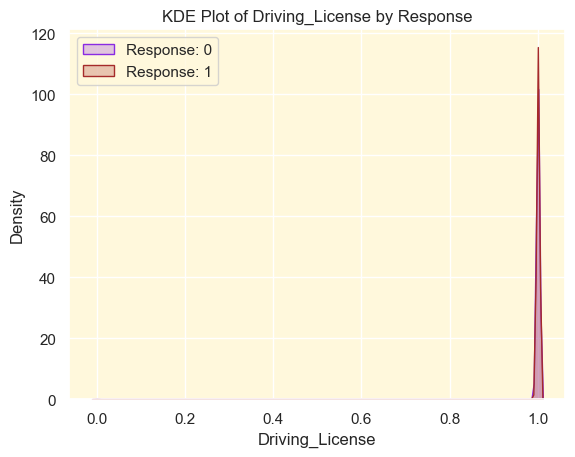

In [70]:
sns.kdeplot(data=df[df['Response'] == 0]['Driving_License'], label='Response: 0', fill=True, color='blueviolet')
sns.kdeplot(data=df[df['Response'] == 1]['Driving_License'], label='Response: 1', fill=True, color='brown')

plt.title("KDE Plot of Driving_License by Response")
plt.xlabel("Driving_License")
plt.ylabel("Density")
plt.legend()
plt.show()

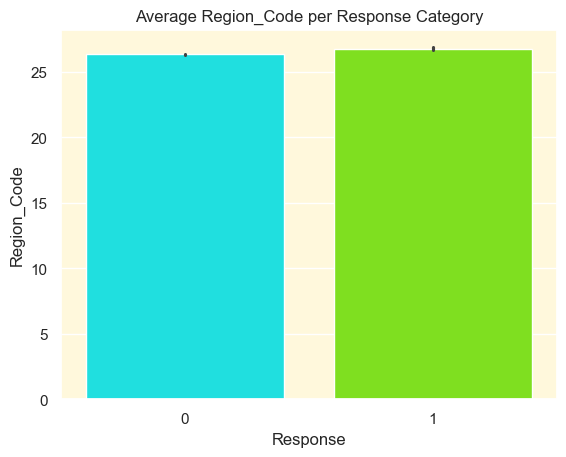

In [71]:
sns.barplot(x='Response', y='Region_Code', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Region_Code per Response Category")
plt.show()

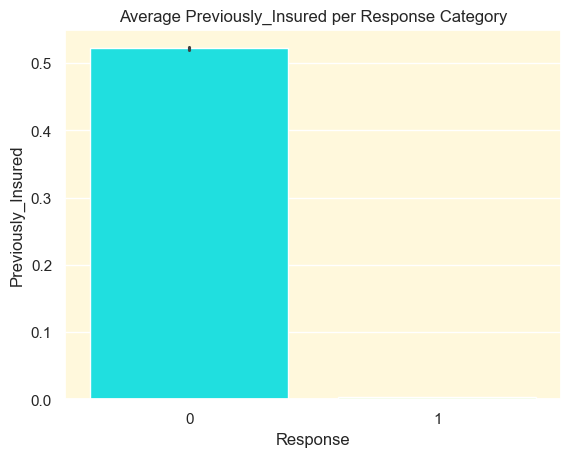

In [73]:
sns.barplot(x='Response', y='Previously_Insured', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Previously_Insured per Response Category")
plt.show()

In [49]:
countone= (df['Previously_Insured'] == 1).sum()
zero = (381108 - countone)
print(zero)
percentage = ((381108 - 174628)/381108)*100
print(percentage)
countone

206480
54.17886793244959


174628

In [50]:
countone= (df['Response'] == 1).sum()
zero = ((381108 - countone)/381108)*100
print(zero)
one = ((381108-334398)/381108)*100
one

87.74363172643976


12.25636827356025

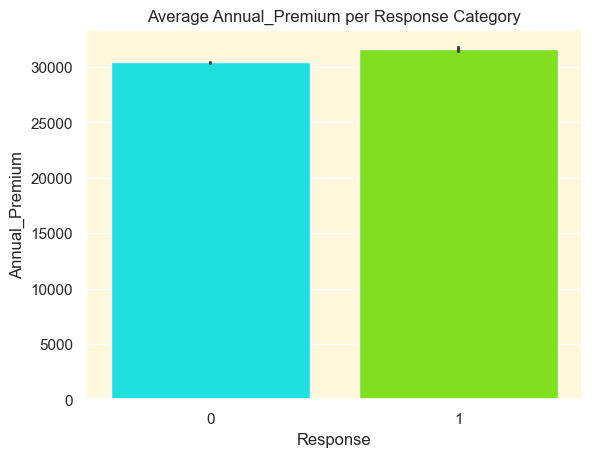

In [19]:
sns.barplot(x='Response', y='Annual_Premium', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Annual_Premium per Response Category")
plt.show()

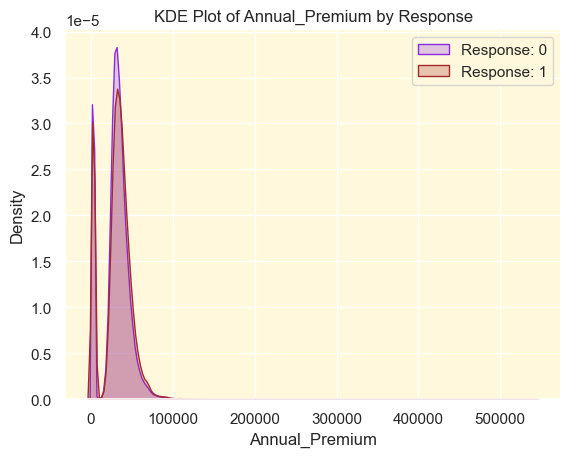

In [78]:
sns.kdeplot(data=df[df['Response'] == 0]['Annual_Premium'], label='Response: 0', fill=True, color='blueviolet')
sns.kdeplot(data=df[df['Response'] == 1]['Annual_Premium'], label='Response: 1', fill=True, color='brown')

plt.title("KDE Plot of Annual_Premium by Response")
plt.xlabel("Annual_Premium")
plt.ylabel("Density")
plt.legend()
plt.show()

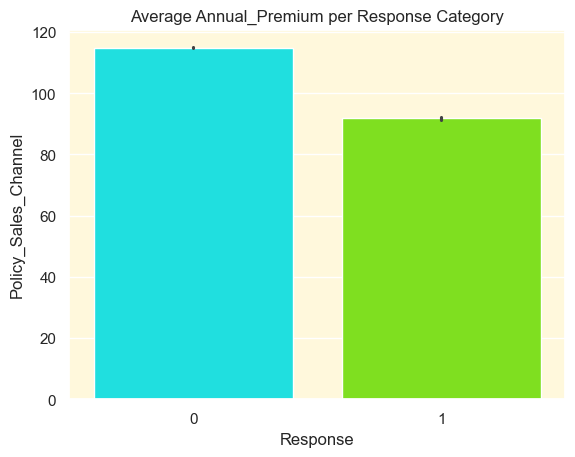

In [79]:
sns.barplot(x='Response', y='Policy_Sales_Channel', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Annual_Premium per Response Category")
plt.show()

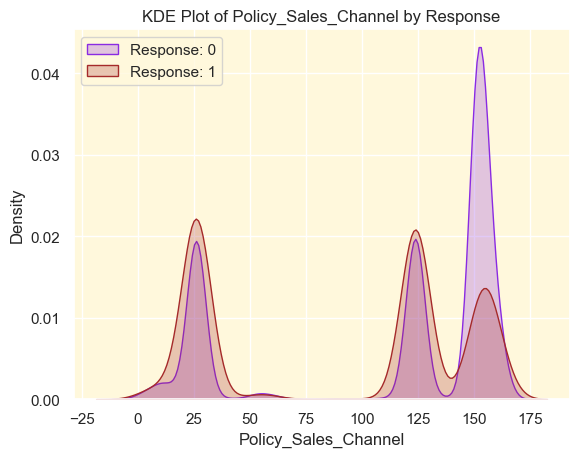

In [80]:
sns.kdeplot(data=df[df['Response'] == 0]['Policy_Sales_Channel'], label='Response: 0', fill=True, color='blueviolet')
sns.kdeplot(data=df[df['Response'] == 1]['Policy_Sales_Channel'], label='Response: 1', fill=True, color='brown')

plt.title("KDE Plot of Policy_Sales_Channel by Response")
plt.xlabel("Policy_Sales_Channel")
plt.ylabel("Density")
plt.legend()
plt.show()

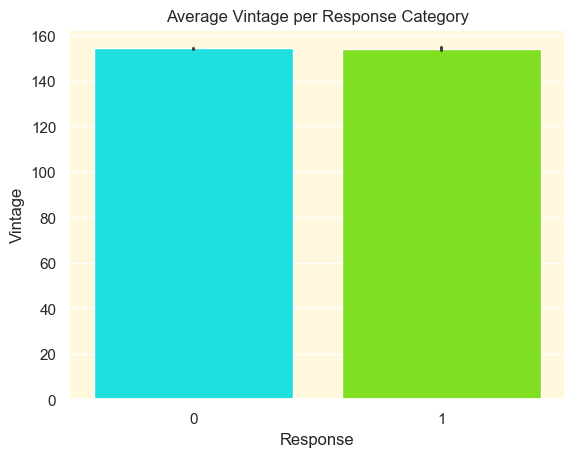

In [81]:
sns.barplot(x='Response', y='Vintage', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Vintage per Response Category")
plt.show()

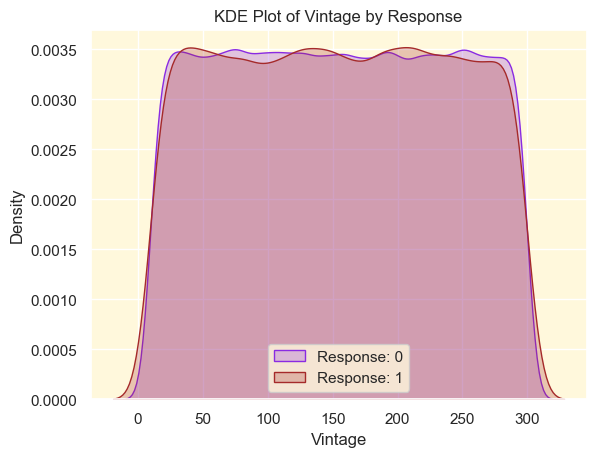

In [82]:
sns.kdeplot(data=df[df['Response'] == 0]['Vintage'], label='Response: 0', fill=True, color='blueviolet')
sns.kdeplot(data=df[df['Response'] == 1]['Vintage'], label='Response: 1', fill=True, color='brown')

plt.title("KDE Plot of Vintage by Response")
plt.xlabel("Vintage")
plt.ylabel("Density")
plt.legend()
plt.show()

____
<a id="cat_target"></a>
### <b><span style='color:crimson'>Step 4.2.2 |</span><span style='color:crimson'> Categorical Features vs Target</span></b> 

<div style="border-radius:10px; padding: 15px; background-color:cornsilk; font-size:115%; text-align:left">

I am going to display __100% stacked bar plots__ for each categorical feature illustrating the proportion of each category across the two target classes, complemented by the exact counts and percentages on the bars.

In [52]:
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

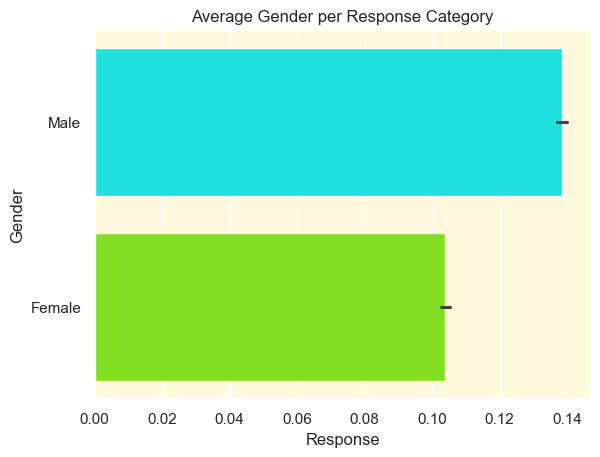

In [53]:
sns.barplot(x='Response', y='Gender', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Gender per Response Category")
plt.show()

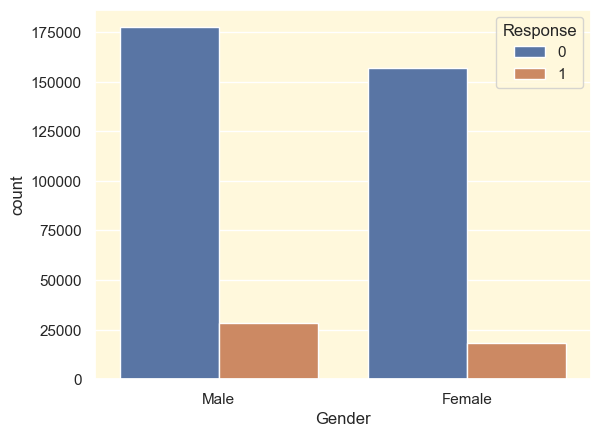

In [85]:
sns.countplot(x='Gender', hue='Response', data=df)
plt.show()

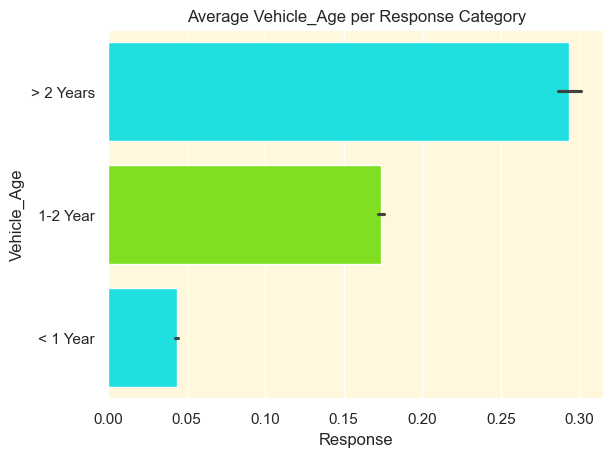

In [86]:
sns.barplot(x='Response', y='Vehicle_Age', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Vehicle_Age per Response Category")
plt.show()

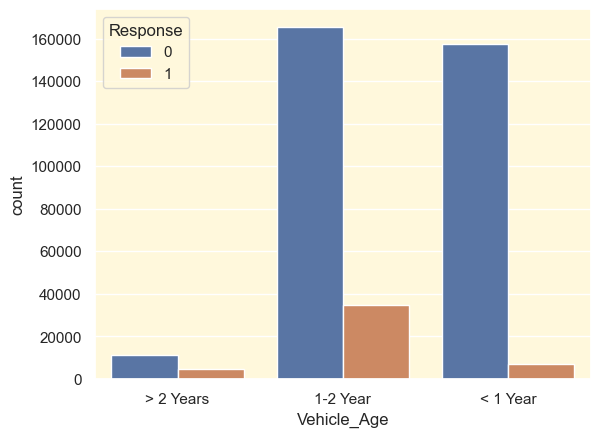

In [87]:
sns.countplot(x='Vehicle_Age', hue='Response', data=df)
plt.show()

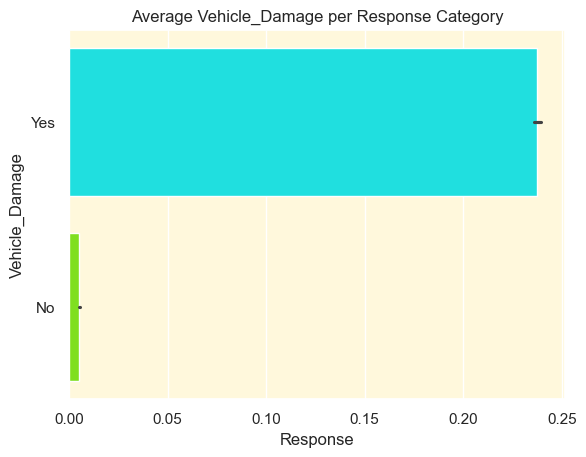

In [88]:
sns.barplot(x='Response', y='Vehicle_Damage', data=df, palette=['cyan', 'chartreuse'])
plt.title("Average Vehicle_Damage per Response Category")
plt.show()

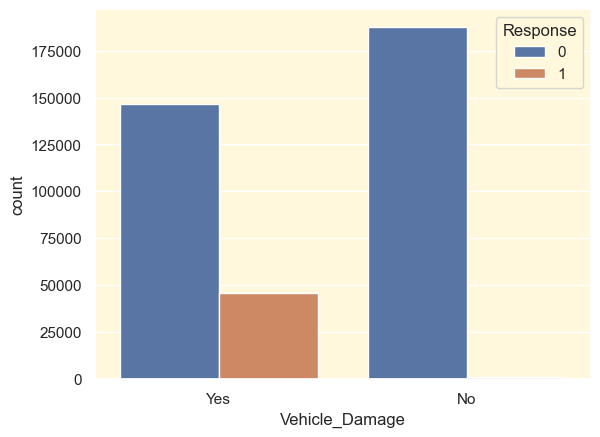

In [89]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.show()

<a id="preprocessing"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:crimson'>Step 5.1 |</span><span style='color:crimson'> Irrelevant Features Removal</span></b>

In [118]:
df.drop('id', axis=1, inplace=True)

<a id="missing"></a>
# <b><span style='color:crimson'>Step 5.2 |</span><span style='color:crimson'> Missing Value Treatment</span></b>

In [54]:
df.isnull().sum().sum()

0

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

____
<a id="outlier"></a>
# <b><span style='color:crimson'>Step 5.3 |</span><span style='color:crimson'> Outlier Treatment</span></b>

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [55]:
continuous_features

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [56]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

Age                         0
Driving_License           812
Region_Code                 0
Previously_Insured          0
Annual_Premium          10320
Policy_Sales_Channel        0
Vintage                     0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">
    
Upon identifying outliers for the specified continuous features, we found the following:

* __`age`__: No outliers
* __`Driving_License`__: 812 outliers
* __`Region_Code`__:  0 outliers
* __`Previously_Insured`__: 0 outlier
* __`Annual_Premium`__: 10320 outliers
* __`Policy_Sales_Channel`__: 0 outliers
* __`Vintage`__: 0 outliers


In [57]:
#By Using Direct method outliers are removed

In [58]:
min_range = df['Annual_Premium'].mean()-(3*df['Annual_Premium'].std())
max_range = df['Annual_Premium'].mean()+(3*df['Annual_Premium'].std())

In [59]:
min_range,max_range

(-21075.075589443528, 82203.85475236017)

In [60]:
new_data = df[df['Annual_Premium']<=max_range]

In [61]:
new_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [62]:
df = new_data

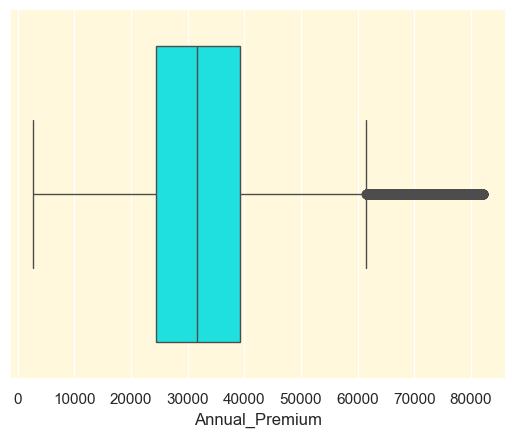

In [63]:
sns.boxplot(x='Annual_Premium', data=new_data, color='aqua')
plt.show()

____
<a id="encoding"></a>
# <b><span style='color:crimson'>Step 5.4 |</span><span style='color:crimson'> Categorical Features Encoding</span></b>

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:112%; text-align:left">

<h3 align="left"><font color=crimson>One-hot Encoding Decision:</font></h3>
    
Based on the feature descriptions, let's decide on one-hot encoding:

1. __Nominal Variables__: These are variables with no inherent order. They should be one-hot encoded because using them as numbers might introduce an unintended order to the model.

2. __Ordinal Variables__: These variables have an inherent order. They don't necessarily need to be one-hot encoded since their order can provide meaningful information to the model.

Given the above explanation:

- __`Gender`__: This is a binary variable with two categories (male and female), so it need one-hot encoding.
 
    
- __`Vehicle_Damage`__: Vehical damage is requred to know the conditin of vehical and it is neccessary to beo one-hot encoded.
  
    
- __`Vehicle_Age`__: This is not a binary variable (true or false), so it doesn't need one-hot encoding.
<h4 align="left">Summary:</h4>

- __Need One-Hot Encoding__: __`Gender`__, __`Vehicle_Damage`__
- __Don't Need One-Hot Encoding__: __`Vehicle_Age`__

In [64]:
# Extract relevant columns
en_data = df[["Gender", "Vehicle_Damage",]]

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
ohe = OneHotEncoder(drop="first")
ohe.fit_transform(en_data).toarray()
df[["Gender", "Vehicle_Damage"]] = ohe.fit_transform(en_data).toarray()
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1.0,44,1,28.0,0,> 2 Years,1.0,40454.0,26.0,217,1
1,2,1.0,76,1,3.0,0,1-2 Year,0.0,33536.0,26.0,183,0
2,3,1.0,47,1,28.0,0,> 2 Years,1.0,38294.0,26.0,27,1
3,4,1.0,21,1,11.0,1,< 1 Year,0.0,28619.0,152.0,203,0
4,5,0.0,29,1,41.0,1,< 1 Year,0.0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1.0,74,1,26.0,1,1-2 Year,0.0,30170.0,26.0,88,0
381105,381106,1.0,30,1,37.0,1,< 1 Year,0.0,40016.0,152.0,131,0
381106,381107,1.0,21,1,30.0,1,< 1 Year,0.0,35118.0,160.0,161,0
381107,381108,0.0,68,1,14.0,0,> 2 Years,1.0,44617.0,124.0,74,0


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the column, and overwrite it in the same DataFrame
df['Response'] = le.fit_transform(df['Response'])

In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [69]:
df["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [70]:
en_data_ord = [['< 1 Year','1-2 Year','> 2 Years']]

In [71]:
one = OrdinalEncoder(categories=en_data_ord)

In [72]:
one.fit(df[["Vehicle_Age"]])

OrdinalEncoder(categories=[['< 1 Year', '1-2 Year', '> 2 Years']])

In [73]:
df[["Vehicle_Age"]]=one.transform(df[["Vehicle_Age"]])

____
<a id="scaling"></a>
# <b><span style='color:crimson'>Step 5.5 |</span><span style='color:crimson'> Feature Scaling</span></b>

<div style="border-radius:10px; padding: 15px; background-color: cornsilk; font-size:115%; text-align:left">
___Feature Scaling__ is a crucial preprocessing step __for algorithms that are sensitive to the magnitude or scale of features__. Models like __SVM__, __LR__, __KNN__,and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. __Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.__


In [104]:
x = df.iloc[:,:-1]
y = df['Response']

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=53)

In [108]:
print(y.dtype)

int32


In [83]:
df.duplicated().sum()

0

In [84]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1.0,44,1,28.0,0,2.0,1.0,40454.0,26.0,217,1
1,2,1.0,76,1,3.0,0,1.0,0.0,33536.0,26.0,183,0
2,3,1.0,47,1,28.0,0,2.0,1.0,38294.0,26.0,27,1
3,4,1.0,21,1,11.0,1,0.0,0.0,28619.0,152.0,203,0
4,5,0.0,29,1,41.0,1,0.0,0.0,27496.0,152.0,39,0


<a id="dt"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [86]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(x_train,y_train)

# Combine into a DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='target')], axis=1)


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight='balanced')

In [89]:
# dt = DecisionTreeClassifier()
# dt.fit(x_train,y_train)

In [90]:
dt.score(x_test,y_test)*100

77.32701305097267

In [91]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, dt.predict(x_train)))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92    232778
           1       0.47      0.96      0.64     32540

    accuracy                           0.86    265318
   macro avg       0.73      0.91      0.78    265318
weighted avg       0.93      0.86      0.88    265318



In [92]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     99860
           1       0.29      0.61      0.40     13848

    accuracy                           0.77    113708
   macro avg       0.61      0.70      0.63    113708
weighted avg       0.86      0.77      0.80    113708



In [93]:
from sklearn.metrics import roc_auc_score

y_proba = dt.predict_proba(x_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


ROC AUC Score: 0.7029159309457272


<a id="dt"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | RandomForestClassifier</p>

⬆️ [Table of Contents](#contents_tabel)

In [96]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [99]:
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]  # For ROC AUC


In [109]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Classification metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# ROC AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_score)


              precision    recall  f1-score   support

           0       0.97      0.74      0.84     99860
           1       0.30      0.81      0.44     13848

    accuracy                           0.75    113708
   macro avg       0.63      0.78      0.64    113708
weighted avg       0.89      0.75      0.79    113708

ROC AUC Score: 0.84723944617207


# <a id="dt"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 |precision_recall_curve</p>

⬆️ [Table of Contents](#contents_tabel)

In [110]:
y_pred_probs = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1

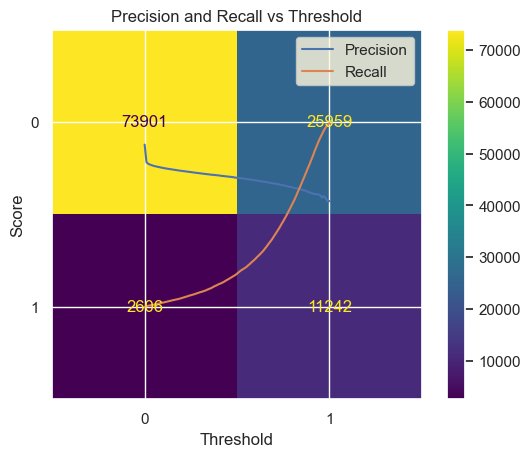

In [111]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Plot
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [112]:
from sklearn.metrics import f1_score

best_threshold = 0.0
best_f1 = 0.0

for t in thresholds:
    preds = (y_pred_probs >= t).astype(int)
    score = f1_score(y_test, preds)
    if score > best_f1:
        best_f1 = score
        best_threshold = t

print(f"Best Threshold: {best_threshold:.3f}, Best F1-Score: {best_f1:.4f}")


Best Threshold: 0.550, Best F1-Score: 0.4429


In [113]:
y_pred_tuned = (y_pred_probs >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))


Confusion Matrix:
 [[75508 24352]
 [ 2982 10866]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85     99860
           1       0.31      0.78      0.44     13848

    accuracy                           0.76    113708
   macro avg       0.64      0.77      0.64    113708
weighted avg       0.88      0.76      0.80    113708



<a id="dt"></a>
# <p style="background-color:crimson; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | Logistic Regression</p>

⬆️ [Table of Contents](#contents_tabel)


In [117]:

# Step 1: Prepare data
X = df.drop('Response', axis=1)
y = df['Response']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Logistic Regression with class weight
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66528
           1       0.25      0.97      0.40      9278

    accuracy                           0.64     75806
   macro avg       0.62      0.78      0.57     75806
weighted avg       0.90      0.64      0.70     75806

